<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KMean clustering Algo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

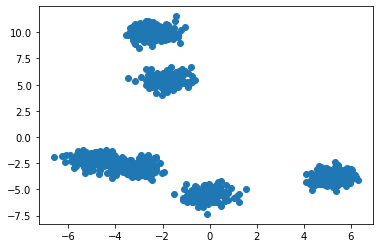

In [9]:
x,  y = make_blobs(n_samples=1000, n_features=2, centers=6, cluster_std=0.5, center_box=(-10.0, 10.0), random_state=50)

x_train, x_new = train_test_split(x, test_size=.01)
plt.scatter(x_train[:,0], x_train[:,1])
plt.show()

In [18]:
clusters = 5
kmeans = KMeans(n_clusters=clusters)
y_pred = kmeans.fit_predict(x_train)

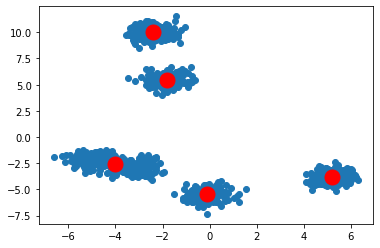

In [19]:
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=225, c='red')
plt.show()

In [20]:
y_pred[:20]

array([3, 0, 2, 2, 2, 2, 4, 4, 0, 2, 1, 2, 1, 4, 0, 4, 0, 1, 1, 2],
      dtype=int32)

In [21]:
kmeans.inertia_

806.0901519620808

In [22]:
kmeans.cluster_centers_

array([[-0.10906083, -5.46728627],
       [-1.80195728,  5.42835466],
       [-4.00285966, -2.53549073],
       [ 5.21492647, -3.83224229],
       [-2.42390197, 10.01245214]])

In [23]:
kmeans.predict(x_new)

array([0, 0, 0, 4, 1, 3, 2, 3, 2, 2], dtype=int32)

In [25]:
kmeans.transform(x_new)

array([[ 0.86417608, 11.56840259,  5.72986509,  5.00011485, 16.18421675],
       [ 0.93751169, 11.54353464,  4.75643131,  6.44152951, 16.1654971 ],
       [ 0.42133424, 10.97898759,  4.55078865,  5.97594051, 15.60451076],
       [15.73600659,  4.72871538, 12.56986412, 16.09715393,  0.60099181],
       [10.67899155,  0.97606899,  7.57127748, 11.74551743,  5.10646558],
       [ 6.03790551, 12.033539  ,  9.84095324,  0.53428195, 16.1735484 ],
       [ 4.81002652,  7.30527786,  1.15186918,  8.63091978, 11.78493244],
       [ 6.49189935, 12.11236979, 10.21314804,  0.93436477, 16.180892  ],
       [ 5.83110468,  7.6771103 ,  0.99470687, 10.0213329 , 11.93670174],
       [ 6.1375109 ,  7.88580139,  1.26338624, 10.43137496, 12.0678767 ]])

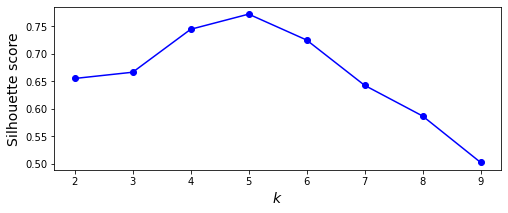

In [27]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(x)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

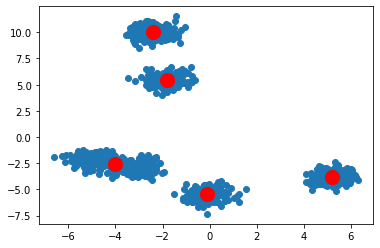

In [28]:
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(x_train)
# plotting the centroids of each group
plt.scatter(x_train[:,0], x_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

Hierarchical clustering Algo

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

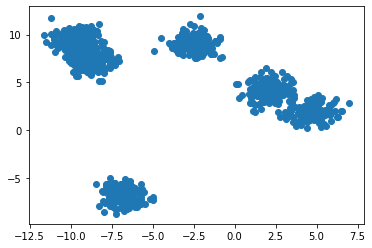

In [46]:
# Creating dataset for clustering problem
X, y = make_blobs(n_samples=1000, centers=6, cluster_std=.75, random_state=42)

# plotting dataset
plt.scatter(X[:,0], X[:,1])
plt.show()

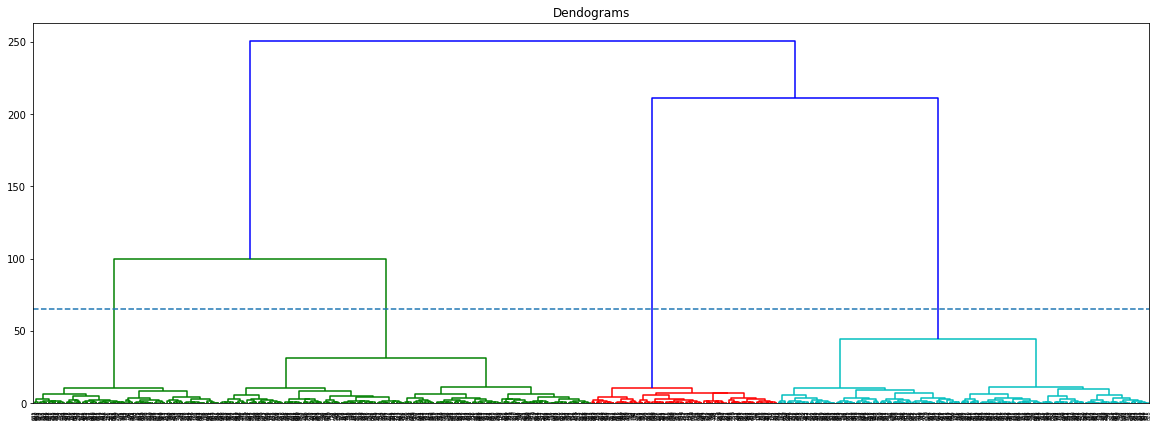

In [47]:
plt.figure(figsize=(20,7))
dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendograms")
plt.axhline(linestyle='--', y=65)
plt.show()

In [48]:
agglo_clus = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="ward")

In [49]:
agglo_clus.fit(X)

labels = agglo_clus.labels_

labels[:10]

array([2, 0, 5, 2, 4, 2, 1, 4, 2, 4])

In [50]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0,1,7))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

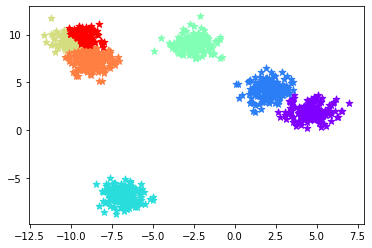

In [54]:
for i in range(7):
  plt.scatter(X[labels==i, 0], X[labels==i, 1], s=50, color=colors[i], marker='*')